In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
plt.rcParams["font.family"] = "serif"

In [2]:
dataset = pd.read_csv('UCS.csv')
X = dataset.iloc[ : , :-4].values
y = dataset.iloc[ : , -2].values

In [3]:
print(y)

[0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.468535
 0.468535 0.475375 0.475375 0.264705 0.264705 0.111265 0.111265 0.29583
 0.29583  0.31441  0.31441  0.114    0.114    0.14866  0.14866  0.19437
 0.19437  0.401275 0.401275 0.31122  0.31122  0.358415 0.358415 0.164615
 0.164615 0.173395 0.173395 0.6767   0.6767   3.50124  3.50124  3.50124
 1.76562  1.76562  1.76562  3.925845 3.925845 3.925845 1.73518  1.73518
 1.73518  1.632015 1.632015 1.632015 1.054605 1.054605 1.054605 1.834705
 1.834705 1.834705 1.82271  1.82271  1.82271  2.027705 2.027705 2.027705
 1.31304  1.31304  1.31304  2.23438  2.23438  2.23438  1.18559  1.18559
 1.18559  0.603625 0.603625 0.603625 0.7394   0.7394   0.7394   0.927495
 0.927495 0.927495]


In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 0] = le.fit_transform(X[:, 0])

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 5] = le.fit_transform(X[:, 5])

In [6]:
print(X)

[[0 25 3866 0.0 1 0 20.983385000000002]
 [0 25 3895 0.0 2 0 18.76521]
 [0 25 3852 0.0 3 0 14.55631]
 [0 250 2768 0.487364743 1 0 11.076039999999999]
 [0 250 2768 0.49496991799999995 2 0 14.18465]
 [0 250 2768 0.48363165 3 0 24.24886]
 [0 500 2090 0.7077403409999999 1 0 12.74923]
 [0 500 2094 0.71097299 2 0 14.54677]
 [0 500 2090 0.705612059 3 0 14.99574]
 [0 750 1526 0.844193573 1 0 11.22918]
 [0 750 1549 0.841843185 2 0 8.247530000000001]
 [0 750 1549 0.838292457 3 0 8.66889]
 [0 1000 1217 0.900903696 1 0 13.36895]
 [0 1000 1218 0.9022133309999999 2 0 6.08809]
 [0 1000 1217 0.900182061 3 0 13.5276152]
 [1 25 3852 0.0 1 0 10.31483]
 [1 25 3810 0.0 1 1 15.72055]
 [1 25 3838 0.0 2 0 8.74892]
 [1 25 3810 0.0 2 1 13.444939999999999]
 [1 25 3824 0.0 3 0 7.99365]
 [1 25 3810 0.0 3 1 15.43635]
 [1 250 2975 0.40351245 1 0 9.15494]
 [1 250 2949 0.40089962 1 1 23.358629999999998]
 [1 250 2949 0.40960917 2 0 3.91435]
 [1 250 2925 0.41061132 2 1 24.53608]
 [1 250 2941 0.40850064 3 0 7.028510000000

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 0)

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
ann = tf.keras.models.Sequential()

In [10]:
ann.add(tf.keras.layers.Dense(units=9, activation='relu'))

In [11]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [12]:
ann.compile(optimizer='adam', loss='mean_squared_error')

In [13]:
history=ann.fit(X_train, y_train, batch_size = 16, epochs = 250)

Epoch 1/250
5/5 [==============================] - 1s 2ms/step - loss: 1.3115
Epoch 2/250
5/5 [==============================] - 0s 4ms/step - loss: 1.2987
Epoch 3/250
5/5 [==============================] - 0s 3ms/step - loss: 1.2845
Epoch 4/250
5/5 [==============================] - 0s 2ms/step - loss: 1.2724
Epoch 5/250
5/5 [==============================] - 0s 2ms/step - loss: 1.2609
Epoch 6/250
5/5 [==============================] - 0s 2ms/step - loss: 1.2483
Epoch 7/250
5/5 [==============================] - 0s 2ms/step - loss: 1.2354
Epoch 8/250
5/5 [==============================] - 0s 3ms/step - loss: 1.2225
Epoch 9/250
5/5 [==============================] - 0s 2ms/step - loss: 1.2105
Epoch 10/250
5/5 [==============================] - 0s 2ms/step - loss: 1.1984
Epoch 11/250
5/5 [==============================] - 0s 2ms/step - loss: 1.1837
Epoch 12/250
5/5 [==============================] - 0s 2ms/step - loss: 1.1724
Epoch 13/250
5/5 [==============================] - 0s 4ms/st

In [14]:
print(ann.predict(sc.transform([[0,1000,1218,0.9022133309999999,2,0,6.08809]])))

[[0.0345048]]


In [15]:
y_pred = ann.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0.46661595 0.        ]
 [0.0345048  0.        ]
 [0.99328458 3.925845  ]
 [0.20307642 0.173395  ]
 [0.97567785 1.82271   ]
 [0.33315963 0.14866   ]
 [0.98536003 3.50124   ]
 [0.27797002 0.6767    ]
 [0.96583843 1.18559   ]
 [0.97889638 0.927495  ]
 [0.08303267 0.        ]
 [0.56400722 0.31441   ]
 [0.28581911 0.401275  ]
 [0.96832073 1.834705  ]]


In [16]:
#plt.plot(y_test, color = 'red', label = 'Real data')
#plt.plot(y_pred, color = 'blue', label = 'Predicted data')
#plt.xlabel('Serial number of data point in test set')
#plt.ylabel('Memory Stress (MPa)')
#plt.title('UCS Prediction')
#plt.legend()
#plt.show()

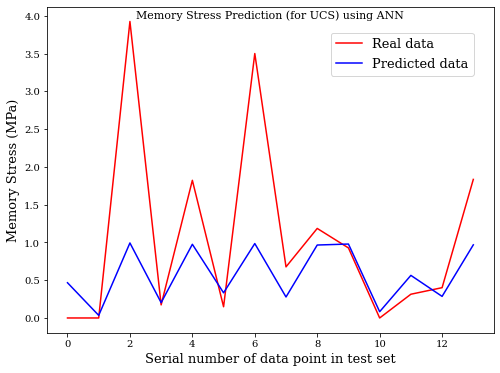

In [19]:
plt.figure(figsize=(8, 6))
plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(y_pred, color = 'blue', label = 'Predicted data')
plt.xlabel('Serial number of data point in test set', fontsize=13)
plt.ylabel('Memory Stress (MPa)',fontsize=13)
plt.title('Memory Stress Prediction (for UCS) using ANN', position=(0.5, 0.945),size=11)
plt.legend(bbox_to_anchor=(0.97,0.94), fontsize=13)
plt.savefig("UCS (ANN)",dpi=1500,bbox_inches = 'tight')
plt.show()

In [18]:
#print('Train r2 score: ', r2_score(y_train_pred2, y_train))
print('Test r2 score: ', r2_score(y_test, y_pred))
#train_mse2 = mean_squared_error(y_train_pred2, y_train)
test_mse2 = mean_squared_error(y_pred, y_test)
#train_rmse2 = np.sqrt(train_mse2)
test_rmse2 = np.sqrt(test_mse2)
#print('Train RMSE: %.4f' % train_rmse2)
print('Test RMSE: %.4f' % test_rmse2)

Test r2 score:  0.2123397256058478
Test RMSE: 1.1001
